In [2]:
from google.colab import auth
auth.authenticate_user()
!gcloud config set project sfhs-333010

Updated property [core/project].


In [3]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0  72485      0 --:--:-- --:--:-- --:--:-- 72485
OK
55 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 55 not upgraded.
Need to get 12.5 MB of archives.
After this operation, 28.5 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.38.0_amd64.deb ...
Unpacking gcsfuse (0.38.0) ...
Setting up gcsfuse (0.38.0) ...


In [4]:
!mkdir data
!gcsfuse --implicit-dirs tng100 data


2021/12/07 08:14:48.501183 Start gcsfuse/0.38.0 (Go version go1.17.3) for app "" using mount point: /content/data
2021/12/07 08:14:48.517349 Opening GCS connection...
2021/12/07 08:14:48.645536 Mounting file system "tng100"...
2021/12/07 08:14:48.677649 File system has been successfully mounted.


In [5]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

# TNG100 SEDs (No dust)
The objective is to predict the SFHs (middle column) or time at which half of the stellar mass has been built (right column) using the galaxy Spetral Energy Distribution (SED, left column)

The SEDs shown here do not contain dust emission. Therefore they lack of realism, especially at longer wavelengths. However, the sample is large.

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, m

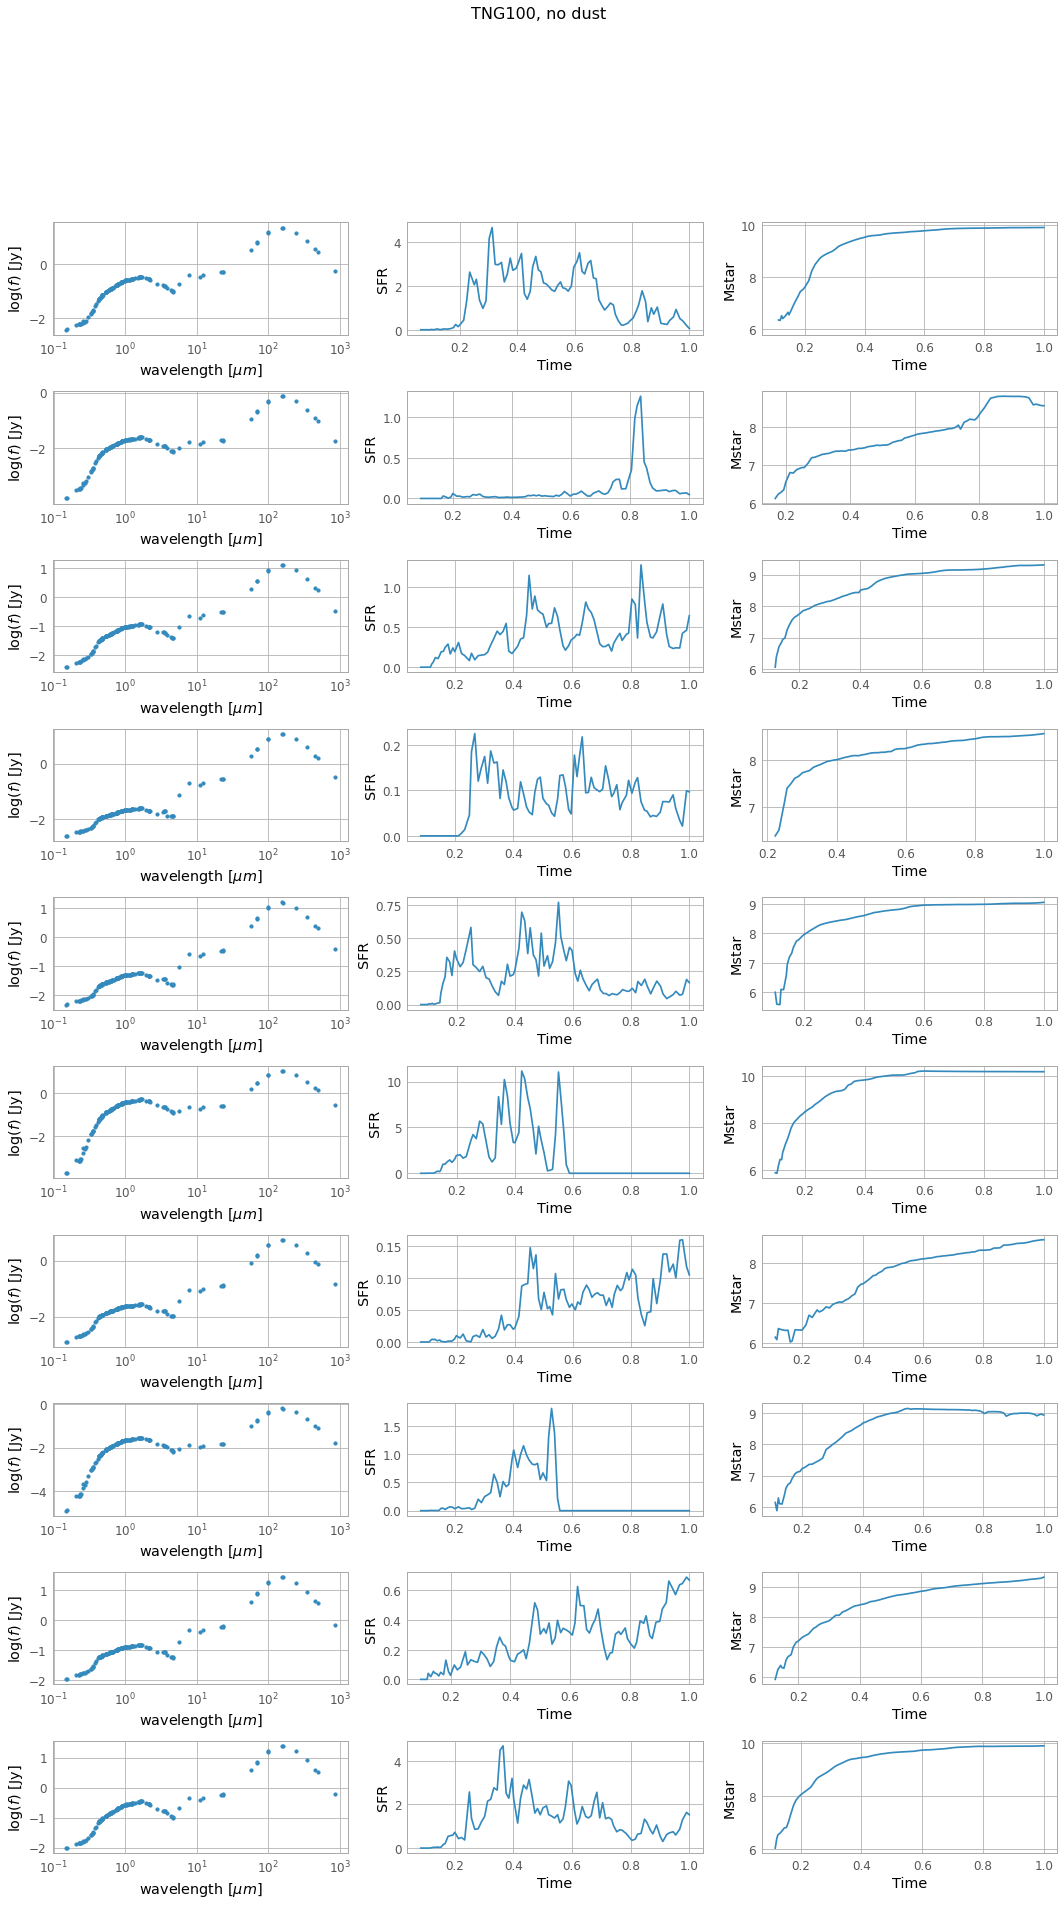

In [6]:

from numpy import random
from numpy import loadtxt

# load catalogs
cat_path = "/content/data/phot_TNG100_dylan_143.csv"
phot_cat = pd.read_csv(cat_path)
sfh_path = "/content/data/cats_SFH/"
wl = loadtxt('/content/data/wl.csv', delimiter=',')/10**4

#index pandas table
shids = phot_cat['subhaloIDs']
phot_cat.set_index("subhaloIDs", inplace=True)
phot_cat.head()

#plot figures
fig, axs = plt.subplots(10, 3)
fig.set_size_inches(18, 30)
fig.suptitle("TNG100, no dust", fontsize=16)
for index in range(10):
    sh = int(shids[index+random.randint(0,high=len(shids)-20)])
    obj=phot_cat.loc[sh][:]
    #apparent mags
    app_mag = obj.values+5*(np.log10(20e6)-1) #assume at 20pc
    flux = 10**(.4*(-app_mag[np.array(wl)<10**3]+8.90)) #convert to Jy
    axs[index, 0].scatter(np.array(wl)[np.array(wl)<10**3],np.log10(flux),s=10)
    axs[index, 0].set_xlabel("wavelength [$\mu m$]")
    axs[index, 0].set_xscale('log')
    try:
      sfh = pd.read_csv(sfh_path+"TNG100_mainprojenitors_"+str(sh)+".csv")
    except:
      continue  
    axs[index, 0].set_ylabel("$\log(f)$ [Jy]")
    axs[index, 1].set_xlabel("Time")
    axs[index, 1].set_ylabel("SFR")
    axs[index, 1].plot(sfh.time,sfh.SFR_halfRad)
    axs[index, 2].plot(sfh.time,np.log10(sfh.Mstar_Half)+10)
    axs[index, 2].set_xlabel("Time")
    axs[index, 2].set_ylabel("Mstar")
#plt.savefig("/content/data/TNG100_examples.pdf")

#Images
In addition to photometric information, we also have mock images for all the galaxies in the sample. The following cell shows an example of an image without and with noise added (SDSS)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Mstar')

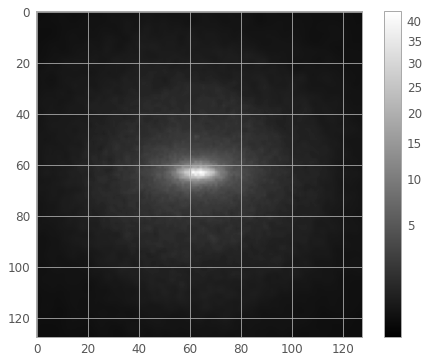

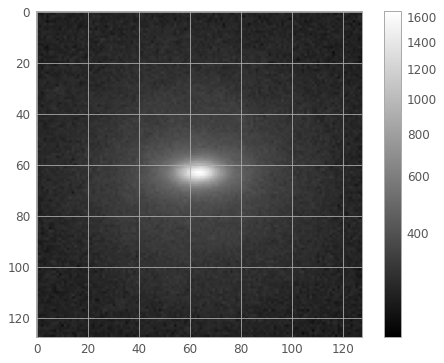

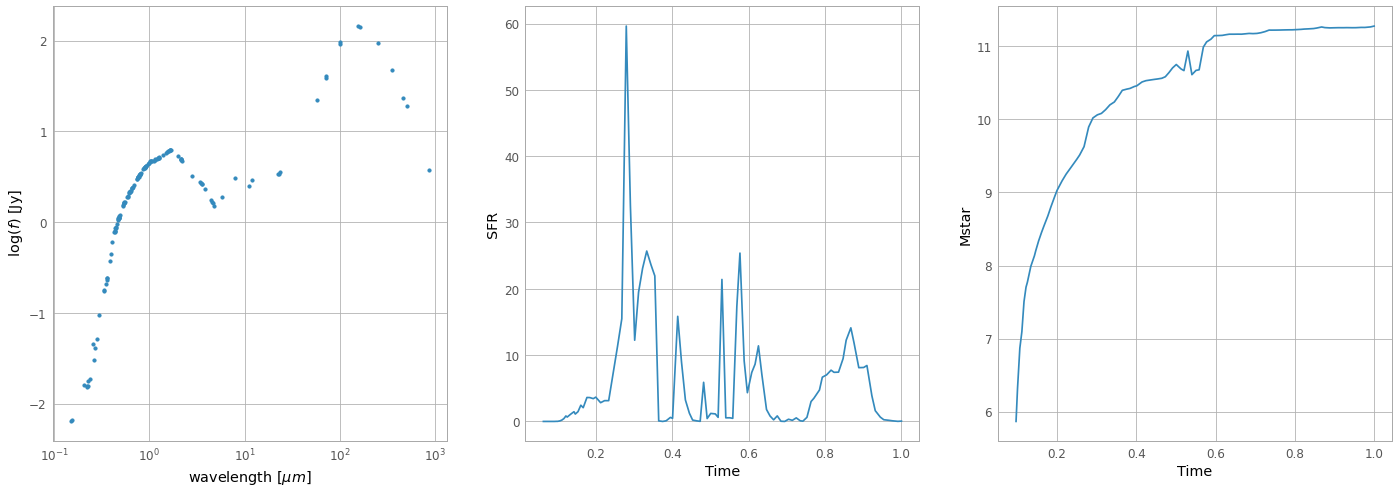

In [7]:
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.visualization import simple_norm

shid=1

#noiseless image
image_path = "/content/data/images/TNG100/sdss/sn99/noiseless"
image_file = image_path+'/broadband_'+str(int(shid))+'.fits'
image_data = fits.getdata(image_file, ext=0)
plt.figure()
fig.suptitle("Noiseless image", fontsize=16)
norm = simple_norm(image_data[3,:,:], 'sqrt')
shape = image_data[3,:,:].shape

plt.imshow(image_data[3,int(shape[0]/2)-64:int(shape[0]/2)+64,int(shape[1]/2)-64:int(shape[1]/2)+64], cmap='gray',norm=norm)
plt.colorbar()


#image with noise + SDSS PSF
image_path = "/content/data/images/TNG100/sdss/sn99/Outputs/i"
image_file = image_path+'/broadband_'+str(int(shid))+'_FullReal.fits_i_band_FullReal.fits'
image_data = fits.getdata(image_file, ext=0)
plt.figure()
fig.suptitle("SDSS image", fontsize=16)
norm = simple_norm(image_data, 'sqrt')
plt.imshow(image_data, cmap='gray', norm=norm)
plt.colorbar()



fig, axs = plt.subplots(1, 3)
fig.set_size_inches(24, 8)
obj=phot_cat.loc[shid][:]
app_mag = obj.values+5*(np.log10(20e6)-1) #assume at 20pc
flux = 10**(.4*(-app_mag[np.array(wl)<10**3]+8.90)) #convert to Jy
axs[0].scatter(np.array(wl)[np.array(wl)<10**3],np.log10(flux),s=10)

axs[0].set_xlabel("wavelength [$\mu m$]")
axs[0].set_ylabel(' $\log(f)$ [Jy]')
axs[0].set_xscale('log')

try:
  sfh = pd.read_csv(sfh_path+"TNG100_mainprojenitors_"+str(shid)+".csv")
except:
  print("not found")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("SFR")
axs[1].plot(sfh.time,sfh.SFR_halfRad)
axs[2].plot(sfh.time,np.log10(sfh.Mstar_Half)+10)
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Mstar")



max: 686.3862536302033
-> 10
-> 20
-> 30
-> 40
-> 50
-> 60
-> 70
-> 80
-> 90
-> 100
-> 110
-> 120
-> 130
-> 140
-> 150
-> 160
-> 170
-> 180
-> 190
-> 200
-> 210
-> 220
-> 230
-> 240
-> 250
-> 260
-> 270
-> 280
-> 290
-> 300
-> 310
-> 320
-> 330
-> 340
-> 350
-> 360
-> 370
-> 380
-> 390
-> 400
-> 410
-> 420
-> 430
-> 440
-> 450
-> 460
-> 470
-> 480
-> 490
-> 500
-> 510
-> 520
-> 530
-> 540
-> 550
-> 560
-> 570
-> 580
-> 590
-> 600
-> 610
-> 620
-> 630
-> 640
-> 650
-> 660
-> 670
-> 680
-> 690
-> 700
-> 710
-> 720
-> 730
-> 740
-> 750
-> 760
-> 770
-> 780
-> 790
-> 800
-> 810
-> 820
-> 830
-> 840
-> 850
-> 860
-> 870
-> 880
-> 890
-> 900
-> 910
-> 920
-> 930
-> 940
-> 950
-> 960
-> 970
-> 980
-> 990
-> 1000
-> 1010
-> 1020
-> 1030
-> 1040
-> 1050
-> 1060
-> 1070
-> 1080
-> 1090
-> 1100
-> 1110
-> 1120
-> 1130
-> 1140
-> 1150
-> 1160
-> 1170
-> 1180
-> 1190
-> 1200
-> 1210
-> 1220
-> 1230
-> 1240
-> 1250
-> 1260
-> 1270
-> 1280
-> 1290
-> 1300
-> 1310
-> 1320
-> 1330
-> 1340
-> 1350
-> 13

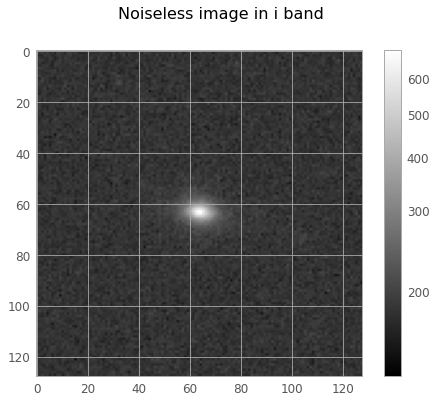

In [24]:
def sph_keep_only_complete_filterset():
  """
  returns a list of correct indices  
  """
  from os.path import exists
  import os
  goodim_list=[]
  image_path_gene = "/content/data/images/TNG100/sdss/sn99/"
  image_path_noisy = image_path_gene + "Outputs/"
  image_path_noiseless = image_path_gene + "noiseless/"
  for count,i in enumerate(os.listdir(image_path_noisy+'i')):
    tag = int(i.split('_')[1])
    if count % 100 == 0:
      print('->',count,i,tag)
    if exists(image_path_noisy+'r/broadband_'+str(int(tag))+"_FullReal.fits_r_band_FullReal.fits") and \
       exists(image_path_noisy+'g/broadband_'+str(int(tag))+"_FullReal.fits_g_band_FullReal.fits") and \
       exists(image_path_noisy+'i/broadband_'+str(int(tag))+"_FullReal.fits_i_band_FullReal.fits") and \
       exists(image_path_noisy+'z/broadband_'+str(int(tag))+"_FullReal.fits_z_band_FullReal.fits"):
         goodim_list.append(count)
    return(goodim_list)

def show_img(image_path,shid,band):
  """
  returns an image (2D nparray)
  """
  image_file = image_path+'/broadband_'+str(int(shid))+"_FullReal.fits_"+band+"_band_FullReal.fits"
  image_data = fits.getdata(image_file, ext=0)
  fig=plt.figure()
  fig.suptitle("Noiseless image in "+band+" band", fontsize=16)
  norm = simple_norm(image_data, 'sqrt')
  plt.imshow(image_data,cmap='gray',norm=norm)
  plt.colorbar()
  return image_data

band="i"
image_path="/content/data/images/TNG100/sdss/sn99/Outputs/"+band
shid=100
image_data = show_img(image_path,shid,band)
import numpy as np
print('max:',np.max(image_data))

goodim_list = sph_keep_only_complete_filterset()
print(goodim_list)

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
%ls /content/data/images/TNG100/sdss/sn99/noiseless/broadband_327*


/content/data/images/TNG100/sdss/sn99/noiseless/broadband_327112.fits
/content/data/images/TNG100/sdss/sn99/noiseless/broadband_327113.fits
/content/data/images/TNG100/sdss/sn99/noiseless/broadband_327114.fits
/content/data/images/TNG100/sdss/sn99/noiseless/broadband_327115.fits
/content/data/images/TNG100/sdss/sn99/noiseless/broadband_327405.fits
/content/data/images/TNG100/sdss/sn99/noiseless/broadband_327406.fits
/content/data/images/TNG100/sdss/sn99/noiseless/broadband_327407.fits
/content/data/images/TNG100/sdss/sn99/noiseless/broadband_327408.fits
/content/data/images/TNG100/sdss/sn99/noiseless/broadband_327409.fits
/content/data/images/TNG100/sdss/sn99/noiseless/broadband_327411.fits
/content/data/images/TNG100/sdss/sn99/noiseless/broadband_327412.fits
/content/data/images/TNG100/sdss/sn99/noiseless/broadband_327413.fits
/content/data/images/TNG100/sdss/sn99/noiseless/broadband_327414.fits
/content/data/images/TNG100/sdss/sn99/noiseless/broadband_327415.fits
/content/data/images

In [ ]:
image_path_gene = "/content/data/images/TNG100/sdss/sn99/"
image_path_noisy = image_path_gene + "Outputs/"
image_path_noiseless = image_path_gene + "noiseless/"
import os
from os.path import exists
goodim_list=[]
for count,i in enumerate(os.listdir(image_path_noisy+'i')):
  tag = int(i.split('_')[1])
  if count % 100 == 0:
    print('->',count,i,tag)
  if exists(image_path_noisy+'r/broadband_'+str(int(tag))+"_FullReal.fits_r_band_FullReal.fits") and \
     exists(image_path_noisy+'g/broadband_'+str(int(tag))+"_FullReal.fits_g_band_FullReal.fits") and \
     exists(image_path_noisy+'z/broadband_'+str(int(tag))+"_FullReal.fits_z_band_FullReal.fits"):
        goodim_list.append(count)


-> 0 broadband_0_FullReal.fits_i_band_FullReal.fits 0
-> 100 broadband_108041_FullReal.fits_i_band_FullReal.fits 108041
-> 200 broadband_118695_FullReal.fits_i_band_FullReal.fits 118695
-> 300 broadband_125067_FullReal.fits_i_band_FullReal.fits 125067
-> 400 broadband_134862_FullReal.fits_i_band_FullReal.fits 134862
-> 500 broadband_140738_FullReal.fits_i_band_FullReal.fits 140738
-> 600 broadband_149169_FullReal.fits_i_band_FullReal.fits 149169
-> 700 broadband_156810_FullReal.fits_i_band_FullReal.fits 156810
-> 800 broadband_163680_FullReal.fits_i_band_FullReal.fits 163680
-> 900 broadband_170560_FullReal.fits_i_band_FullReal.fits 170560
-> 1000 broadband_172664_FullReal.fits_i_band_FullReal.fits 172664
-> 1100 broadband_177725_FullReal.fits_i_band_FullReal.fits 177725
-> 1200 broadband_184850_FullReal.fits_i_band_FullReal.fits 184850
-> 1300 broadband_192920_FullReal.fits_i_band_FullReal.fits 192920
-> 1400 broadband_202648_FullReal.fits_i_band_FullReal.fits 202648
-> 1500 broadband

In [25]:

import tensorflow_datasets as tfds
import tensorflow as tf

!tfds new test211206_sfh

features=tfds.features.FeaturesDict({
    'image': tfds.features.Tensor(shape=(128, 128, 4), dtype=tf.float32),
    'attrs': {k: tf.float32 for k in ['last_merger']}
        })

def _split_generators(self, dl_manager: tfds.download.DownloadManager):
    """Returns a SplitGenerator."""
    # Let TF dataset download our data and put automatically in a temporary folder
    catalog_path = dl_manager.download('https://storage.googleapis.com/ahw2019/test211206_sfh/data/catalog_small.fits')
    cutouts_path = dl_manager.download('https://storage.googleapis.com/ahw2019/test211206_sfh/data/cutouts_small.fits')
    return [
        tfds.core.SplitGenerator(
            name=tfds.Split.TRAIN,
            # These kwargs will be passed to _generate_examples
            gen_kwargs={'catalog_path': catalog_path,
                        'cutouts_path': cutouts_path},
        ),
    ]

def _generate_examples(self, catalog_path, cutouts_path):
    """Yields examples."""
    from astropy.table import Table
    import h5py

    # Loading the data that was downloaded at the previous step
    catalog = Table.read(catalog_path)
    cutouts = h5py.File(cutouts_path, 'r')

    # Go through the examples
    for object_id in catalog['object_id']:
      row = catalog[catalog['object_id'] == object_id]
      cutout = cutouts[str(object_id)]

      # extract image from cutouts
      im = stack_bands(cutout)

      yield object_id, {'image': im, 
                        'attrs':{k: np.asscalar(row[k]) for k in ['specz_redshift', 'a_g', 'a_r', 'a_i', 'a_z', 'a_y']}}

#import sfh...
set = tfds.load('test211206_sfh', split='train')
dset

for example in dset.take(1):
  print(example['attrs']['specz_redshift'])

tf.Tensor(0.78139, shape=(), dtype=float32)

imshow(example['image'][:,:,0:3])


2021-12-06 21:02:47.294982: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Traceback (most recent call last):
  File "/usr/local/bin/tfds", line 8, in <module>
    sys.exit(launch_cli())
  File "/usr/local/lib/python3.7/dist-packages/tensorflow_datasets/scripts/cli/main.py", line 61, in launch_cli
    app.run(main, flags_parser=_parse_flags)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 303, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "/usr/local/lib/python3.7/dist-packages/tensorflow_datasets/scripts/cli/main.py", line 56, in main
    args.subparser_fn(args)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow_datasets/scripts/cli/new.py", line 95, in _create_dataset_files
    create_dataset_files(dataset_name=args.dataset_name, dataset_dir=args.dir)
  File "/usr/local/li

DatasetNotFoundError: ignored

# TNG50, with dust
There are 3000 galaxies modeled with SKIRT with dust.

In [ ]:
from numpy import random
import re
cat_path = "/content/data/fluxes_TNG50.csv"
phot_cat = pd.read_csv(cat_path)

sfh_path = "/content/data/cats_SFH_TNG50/"
wl_cat = pd.read_csv('/content/data/wl_TNG50.csv')

wl_cat[wl_cat['filter_name'].str.contains("GALEX_FUV")==True].wl_eff
#create wl array
wl_TNG50=[]
for f in phot_cat.columns[1:]:
  fs=f.split('F_')
  wl_TNG50.append(wl_cat[wl_cat['filter_name'].str.contains(fs[1],flags=re.IGNORECASE)==True].wl_eff.values[0])
  

shids = phot_cat['GalaxyID']
phot_cat.set_index("GalaxyID", inplace=True)
phot_cat.head()
fig, axs = plt.subplots(10, 3)
fig.set_size_inches(18, 30)
fig.suptitle("TNG50, with dust", fontsize=16)
for index in range(10):
    sh = int(shids[index+random.randint(0,high=len(shids)-20)])
    obj=phot_cat.loc[sh][:]
    flux = obj.values
    #flux = 10**(-0.4*(obj.values[np.array(wl_TNG50)<3*10**4]+48.60))
    axs[index, 0].scatter(np.array(wl_TNG50)[np.array(wl_TNG50)<10**3],np.log10(flux[np.array(wl_TNG50)<10**3]),s=10)
    axs[index, 0].set_xscale('log')
    axs[index, 0].set_xlabel("wavelength ($\mu m$)")
    axs[index, 0].set_ylabel('$\log(f)$ [Jy]')
    try:
      sfh = pd.read_csv(sfh_path+"TNG50_mainprojenitors_"+str(sh)+".csv")
    except:
      continue  
      
    axs[index, 1].set_xlabel("Time")
    axs[index, 1].set_ylabel("SFR")
    axs[index, 1].plot(sfh.time,sfh.SFR_halfRad)
    axs[index, 2].plot(sfh.time,np.log10(sfh.Mstar_Half)+10)
    axs[index, 2].set_xlabel("Time")
    axs[index, 2].set_ylabel("Mstar")
#plt.savefig("/content/data/TNG50_ex.pdf")    